In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

In [69]:
filepath = "/Users/harshini/Desktop/Thinkful/sentiment labelled sentences/amazon.txt"
df = pd.read_csv(filepath, sep='\t',names = ["Sentence", "Score"])

In [70]:
df.head()

,Sentence,Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [71]:
keys = ['good','excellent','great','impressed','recommend','best','sweet','fine','well','nice']
for key in keys:
    df[str(key)] = df.Sentence.str.contains(str(key),case=False)

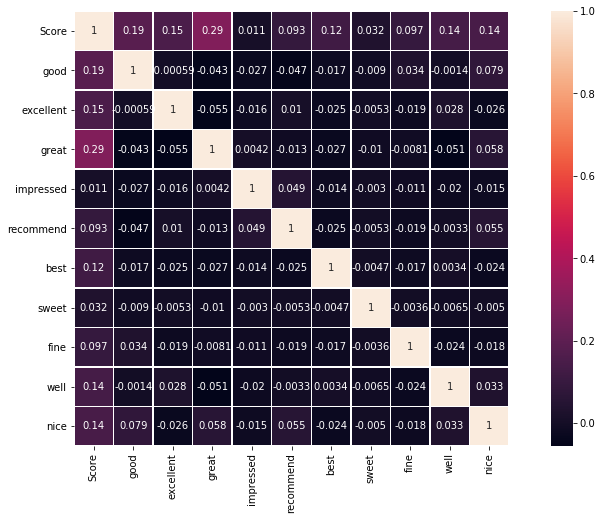

In [72]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5)
plt.show()

In [73]:
data = df[keys]
target = df['Score']

In [74]:
# Train and test with entire data
model1 = BernoulliNB()

model1.fit(data,target)
y_pred = model1.score(data,target)
print('Score when trained and tested on entire Sample: ' + str(round(y_pred,2)))

Score when trained and tested on entire Sample: 0.72


In [75]:
# Test your model with cross validation scores.
from sklearn.model_selection import cross_val_score
model2 = BernoulliNB()
# Use cross validation technique to create 10 folds.
cv_scores = cross_val_score(model2, data, target, cv=10)
print("Cross validation scores for 10 groups \n",cv_scores)

Cross validation scores for 10 groups 
 [0.79 0.74 0.75 0.71 0.73 0.69 0.68 0.69 0.76 0.64]


In [76]:
# Test your model with different holdout groups.
from sklearn.model_selection import train_test_split
model3 = BernoulliNB()

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('Score with 20% Holdout: ' + str(model3.fit(X_train, y_train).score(X_test, y_test)))

Score with 20% Holdout: 0.71


<b>Parameter tuning

In [77]:
# Tuning parameters to get maximum accuracy when "test and train holdout groups" are used.
from sklearn.model_selection import train_test_split
model31 = BernoulliNB()
test_size = []
values = []
rand_state = []

# Changing "test_size" and "random_state" parameters to detect maximum accuracy.
for i in range(200):
    for ts in np.arange(0.10,0.55,0.05):
        tsr = round(ts,2)
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=tsr, random_state=i)
        test_size.append(tsr)
        values.append(round(model31.fit(X_train, y_train).score(X_test, y_test),2))
        rand_state.append(i)
        
ind = values.index(max(values))
print("random_state for maximum accuracy is : ",rand_state[ind])
print("test_size for maximum accuracy is : ",test_size[ind])
print("Maximum accuracy achieved through 'parameter tuning' when 'test and train holdout groups' are used is : ",max(values))

random_state for maximum accuracy is :  157
test_size for maximum accuracy is :  0.1
Maximum accuracy achieved through 'parameter tuning' when 'test and train holdout groups' are used is :  0.84


In [78]:
# Tuning number of folds in cross-validation to achieve maximum accuracy.
from sklearn.model_selection import cross_val_score
model21 = BernoulliNB()
cv_scores = []
crossval_scores = []
fold_list = []

for fold in range(2,20):
    cv_scores = cross_val_score(model21, data, target, cv=fold)
    for j in range(fold):
        crossval_scores.append(round(cv_scores[j],2))
        fold_list.append(fold)
    
ind = crossval_scores.index(max(crossval_scores))
print("Maximum accuracy : {}\nNumber of folds to achieve maximum accuracy : {}".format(max(crossval_scores),fold_list[ind]))

Maximum accuracy : 0.85
Number of folds to achieve maximum accuracy : 14
